# **Group Assignment** - Bike Sharing

- `instant`: record index
- `dteday` : date
- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

## PART I: Exploratory Data Analysis

Importing libraries to use

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go


Importing dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bike_df = pd.read_csv('bike-sharing_hourly.csv')

FileNotFoundError: ignored

In [ ]:
bike_df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

Exploring data type of different features and if there are some null values:

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


No null values, but we are go to change `dteday` to datetime

In [ ]:
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'])
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Let's group by date and by season to create some graphs and see some insisghts

In [ ]:
df_date = bike_df.groupby(['dteday']).mean()
df_date = df_date.reset_index()

In [ ]:
df_season = bike_df.groupby(['yr','season']).mean()
df_season = df_season.reset_index()

C:\Users\gusta\AppData\Local\Temp\ipykernel_33084\2200908715.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_season = bike_df.groupby(['yr','season']).mean()


In [ ]:
df_hr = bike_df.groupby(['yr','hr']).sum()
df_hr = df_hr.reset_index()

C:\Users\gusta\AppData\Local\Temp\ipykernel_33084\2260170070.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hr = bike_df.groupby(['yr','hr']).sum()


## Plots: 2011

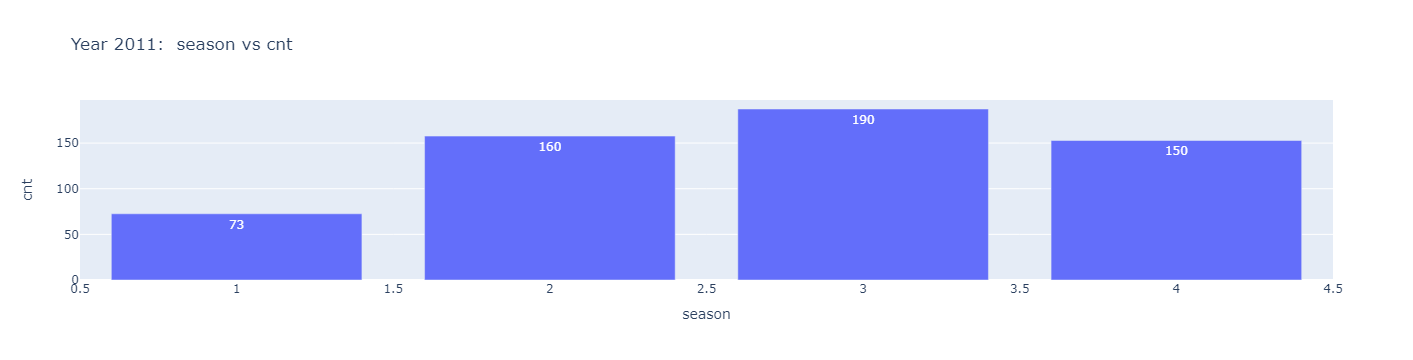

In [ ]:
fig = px.bar(df_season.loc[df_season.yr == 0], y='cnt', x='season', text_auto='.2s', title="Year 2011:  season vs cnt ")

fig.show()

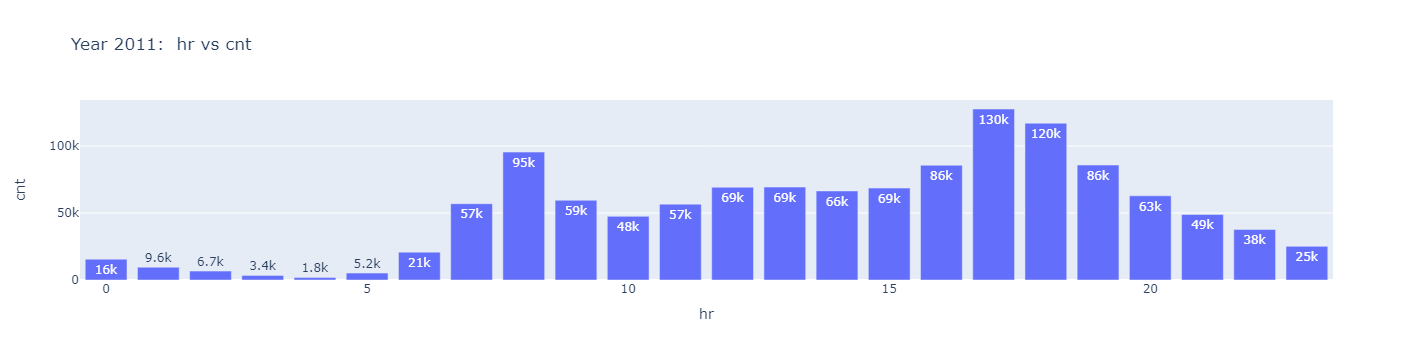

In [ ]:
fig = px.bar(df_hr.loc[df_hr.yr == 0], y='cnt', x='hr', text_auto='.2s', title="Year 2011:  hr vs cnt ")

fig.show()

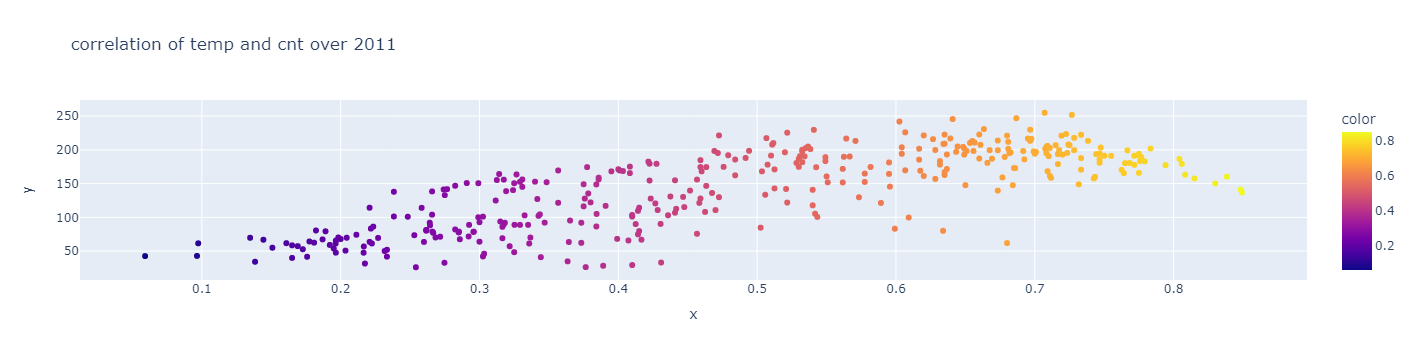

In [ ]:
fig = px.scatter(x=df_date.loc[df_date.yr == 0]['temp'], y=df_date.loc[df_date.yr == 0]['cnt'],color =df_date.loc[df_date.yr == 0]['temp'],title='correlation of temp and cnt over 2011 ')
fig.show()

## Plots: 2012

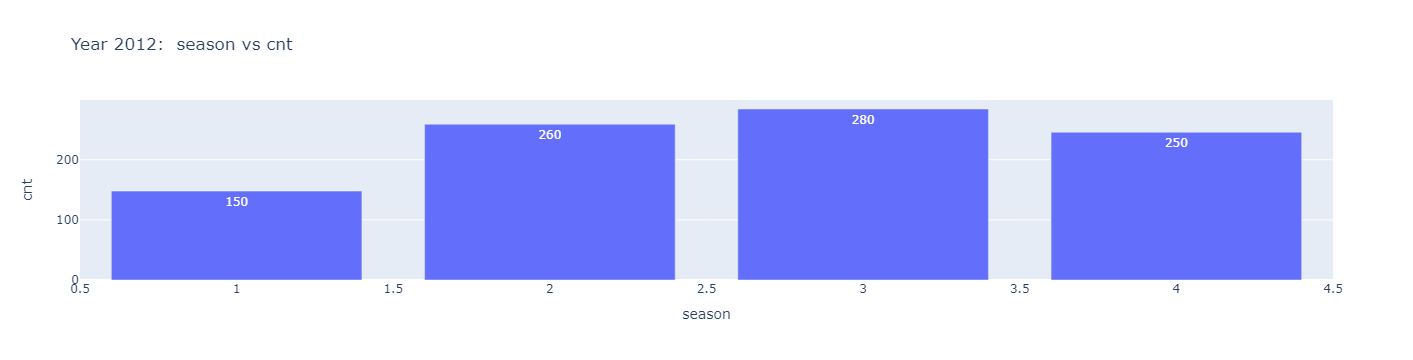

In [ ]:
fig = px.bar(df_season.loc[df_season.yr == 1], y='cnt', x='season', text_auto='.2s', title="Year 2012:  season vs cnt ")

fig.show()

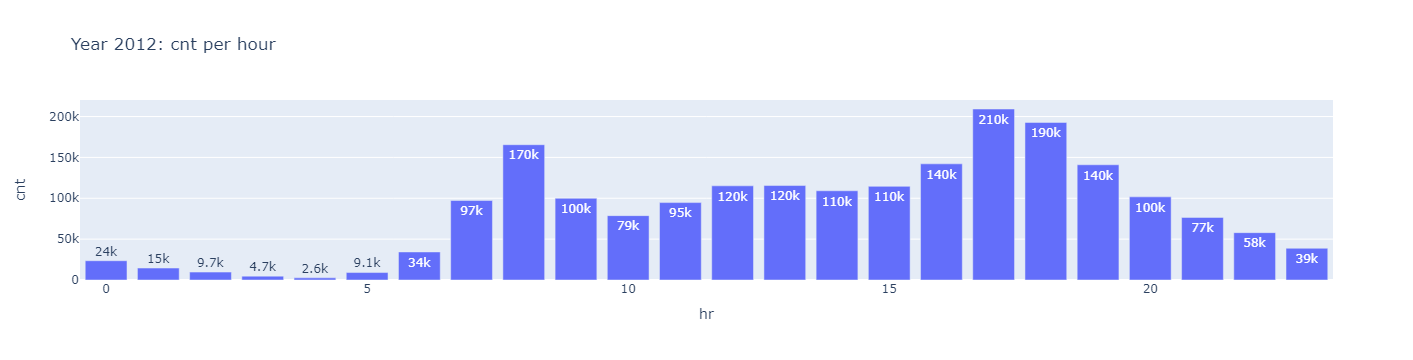

In [ ]:
fig = px.bar(df_hr.loc[df_hr.yr == 1], y='cnt', x='hr', text_auto='.2s', title="Year 2012: cnt per hour ")

fig.show()

C:\Users\gusta\AppData\Local\Temp\ipykernel_33084\4098856296.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



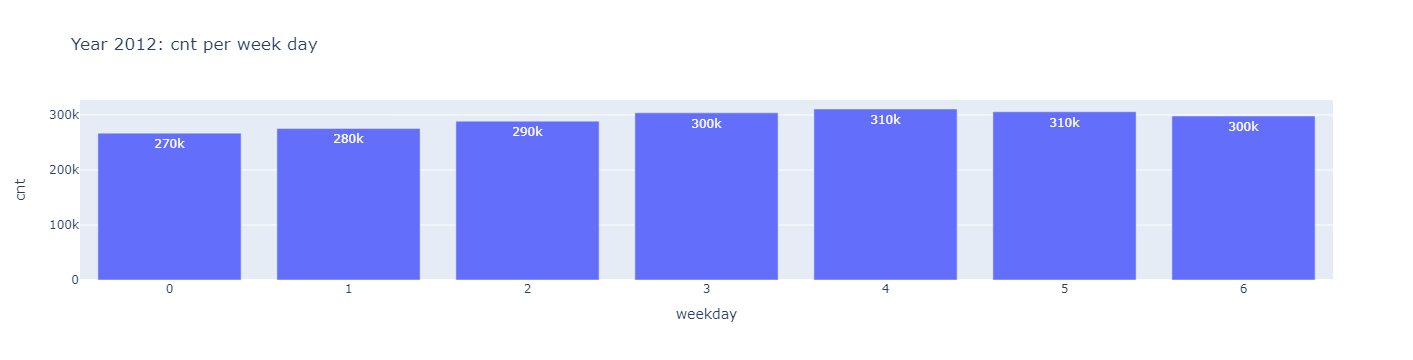

In [ ]:
df_weekday = bike_df.groupby(['yr','weekday']).sum()
df_weekday = df_weekday.reset_index()

fig = px.bar(df_weekday.loc[df_weekday.yr == 1], y='cnt', x='weekday', text_auto='.2s', title="Year 2012: cnt per week day ")

fig.show()

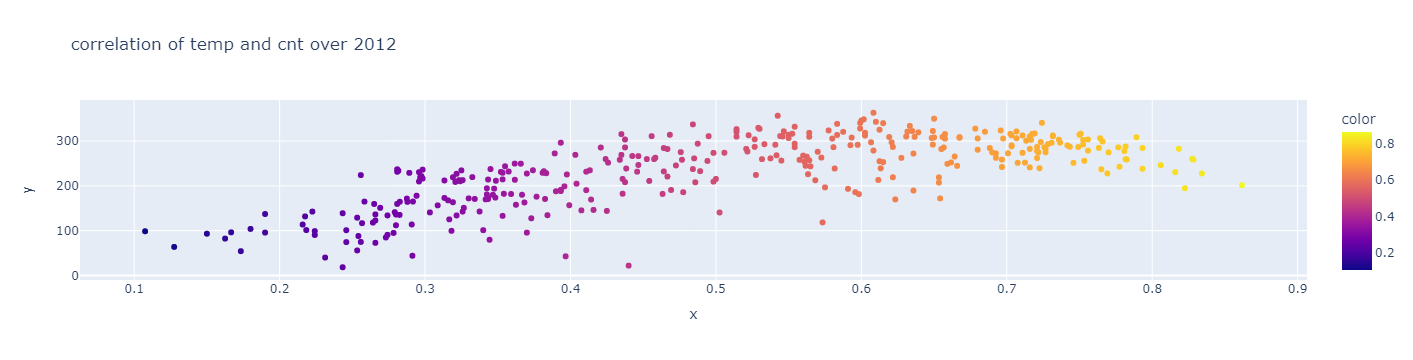

In [ ]:
fig = px.scatter(x=df_date.loc[df_date.yr == 1]['temp'], y=df_date.loc[df_date.yr == 1]['cnt'],color =df_date.loc[df_date.yr == 1]['temp'],title='correlation of temp and cnt over 2012 ')
fig.show()

## Plots: 2011 & 2012

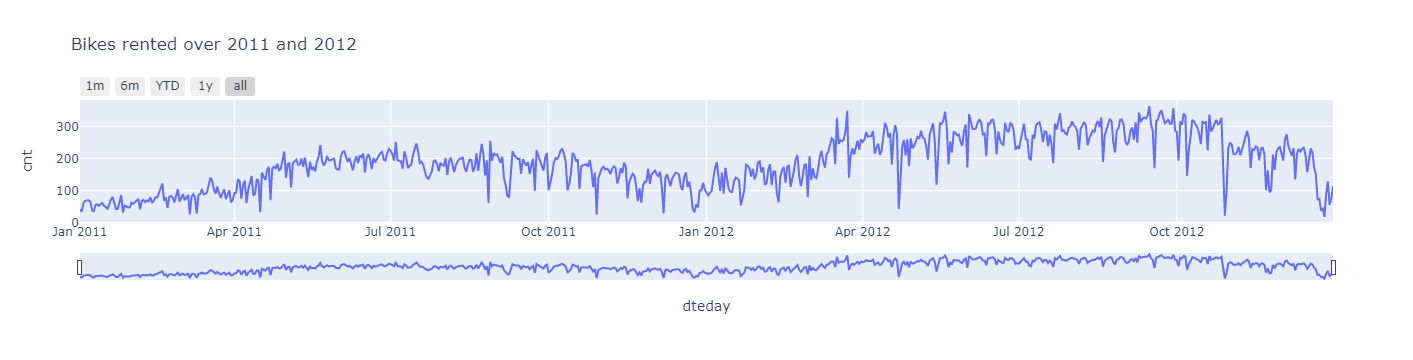

In [ ]:
fig = px.line(df_date, x='dteday', y='cnt', title='Bikes rented over 2011 and 2012')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

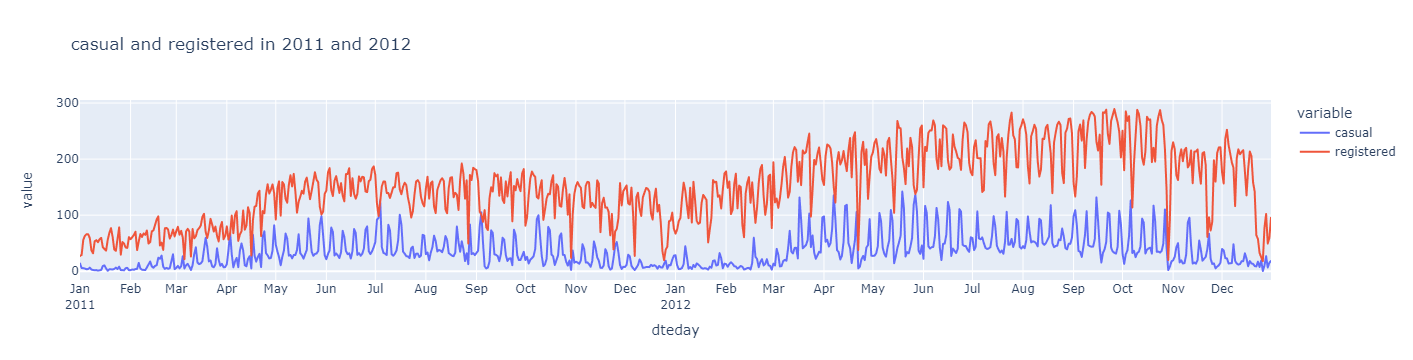

In [ ]:
cols = ['casual','registered']
fig = px.line(df_date, x="dteday", y=cols,
              hover_data={"dteday": "|%B %d, %Y"},
              title='casual and registered in 2011 and 2012')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

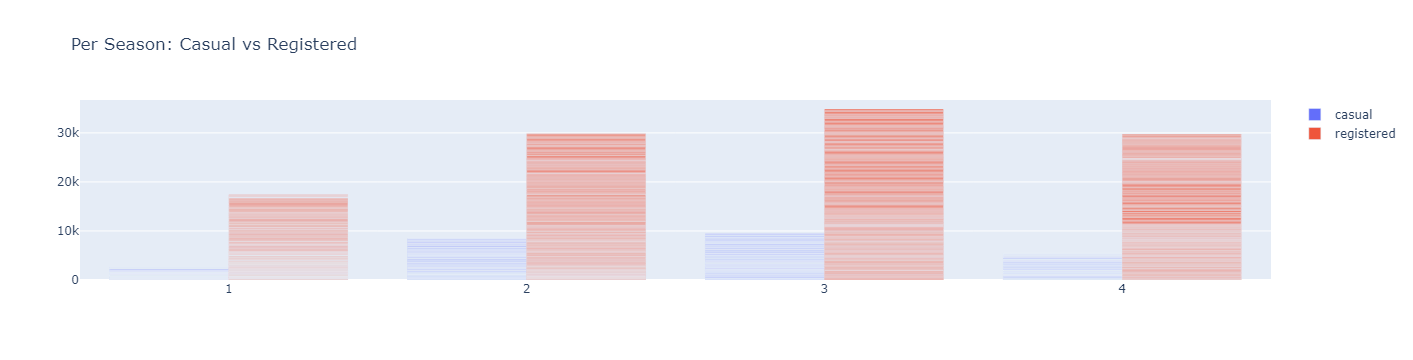

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='casual', x=df_date['season'], y=df_date['casual']),
    go.Bar(name='registered', x=df_date['season'], y=df_date['registered'])
    
])
fig.update_layout(title='Per Season: Casual vs Registered', barmode='group')

# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

## KDE

In [ ]:
cat_cols = [col for col in bike_df.columns if bike_df[col].dtype == 'object']
num_cols = [col for col in bike_df.columns if bike_df[col].dtype != 'object']
num_cols.remove("cnt")

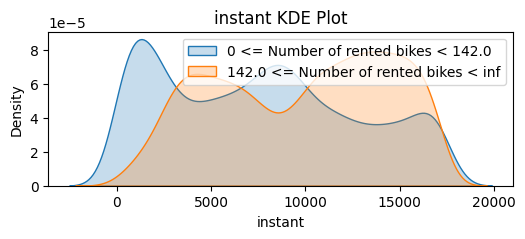

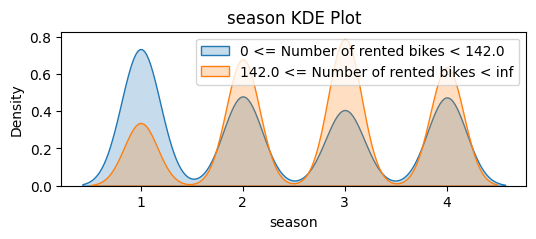

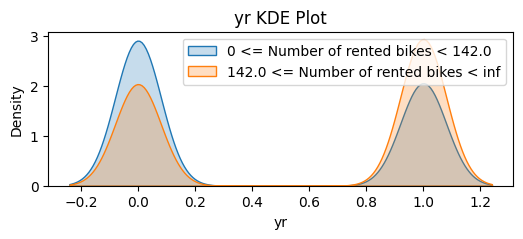

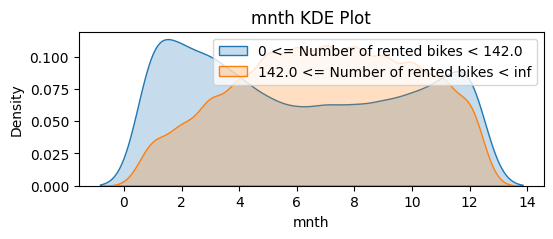

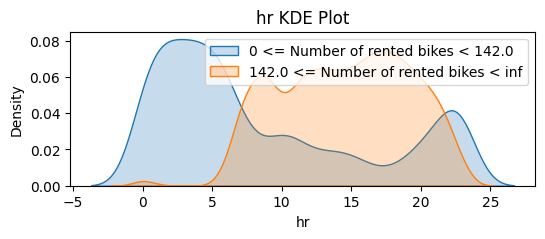

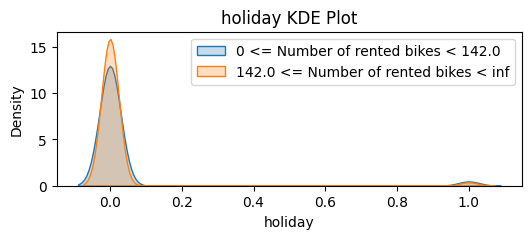

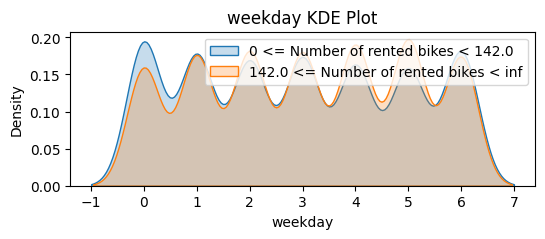

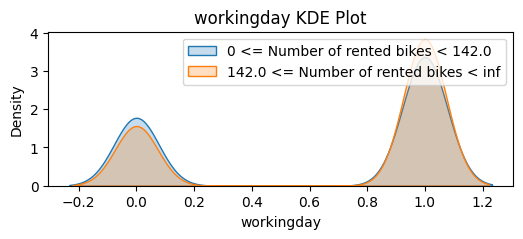

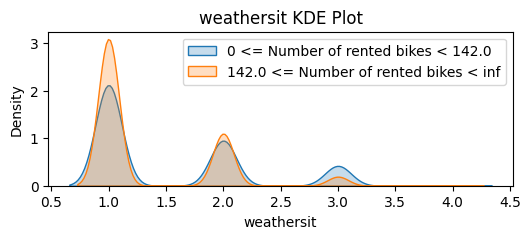

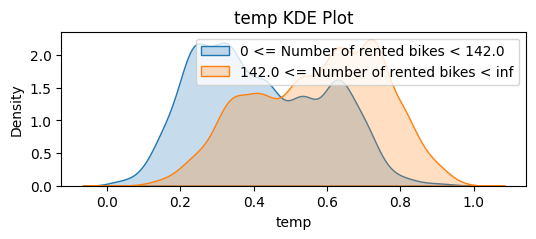

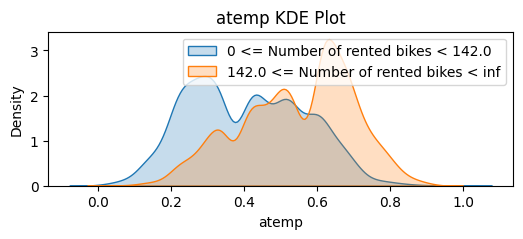

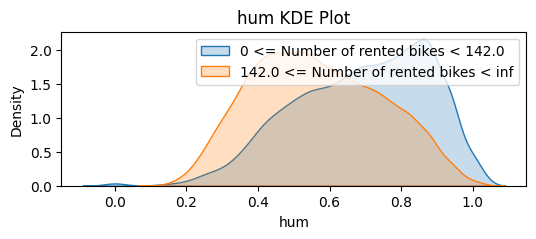

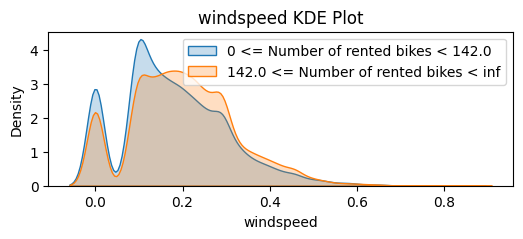

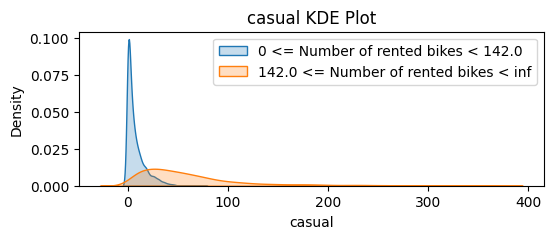

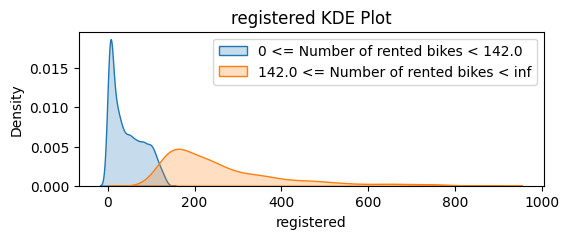

In [ ]:
# Define the ranges of 'cnt' values to plot
cnt_ranges = [(0, bike_df["cnt"].median()), (bike_df["cnt"].median(), np.inf)]

for col in num_cols:
    plt.figure(figsize=(6, 2))
    for i, (cnt_min, cnt_max) in enumerate(cnt_ranges):
        subset = bike_df[(bike_df['cnt'] >= cnt_min) & (bike_df['cnt'] < cnt_max)]
        label = f'{cnt_min} <= Number of rented bikes < {cnt_max}'
        sns.kdeplot(subset[col], fill=True, label=label)
    plt.title(f"{col} KDE Plot")
    plt.legend()
    plt.show()


## Feature Engineering

In [ ]:
bike_df["Working_Hours"] = np.where((bike_df["workingday"] == 1) & (bike_df["hr"] >= 8) & (bike_df["hr"] <= 17), 1 , 0)

In [ ]:
bike_df["Sleeping_Hours"] = np.where(((bike_df["hr"] <= 6) | (bike_df["hr"] >= 23)), 1 , 0)

In [ ]:
bike_df["hum_temp_ratio"] = bike_df["hum"] / bike_df["temp"]
bike_df.head()

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0           1  0.24  0.2879  0.81        0.0       3          13   16   
1           1  0.22  0.2727  0.80        0.0       8          32   40   
2           1  0.22  0.2727  0.80        0.0       5          27   32   
3           1  0.24  0.2879  0.75        0.0       3          10   13   
4           1  0.24  0.2879  0.75        0.0       0           1    1   

   Working_Hours  Sleeping_Hours  hum_temp_ratio  
0              0               1        3.375000  
1              0               1        3.636364  
2              0               1        3.636364  
3              0               1        3.125000  
4              0               1        3.125000

## PART II: Prediction Model

Let's start by importaing the libraries to use

In [ ]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score
from pycaret.regression import *

## 1. Setup

We are going to drop columns `causl` and `registered` since the sum of this is the count of bikes and this will overfit our model

In [ ]:
bike_df_data = bike_df.drop(columns = ["casual", "registered"], axis = 1)

No we split our data, in this case since we are dealing with time series, we are going to use the first year and a half for our train set and the last half year of 2012 for testing the data

In [ ]:
data = bike_df_data[(bike_df_data["dteday"] >= '2011-01-01') & (bike_df_data["dteday"] < '2012-08-01')]
data_unseen = bike_df_data[(bike_df_data["dteday"] >= '2012-08-01')]

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)


We are going to use pycaret to compare the different models we can use

In [ ]:
model = setup(data = data, target = "cnt", silent=True)

**Comparing the models and sort them by the best R2**

In [ ]:
best_model = compare_models()

TypeError: compare_models() got an unexpected keyword argument 'save'

We can see that in this case the best models are `CatBoost` , `LightGBM` , `Extra Tree Regressor`, `XGBoost` and `Random Forest`

**Best model `CatBoost`**

In [ ]:
best_model

In [ ]:
metrics_df = get_metrics(best_model)

Now we tune the model for doing a cross validation of 5 folds, where we can see we get a mean R2 of 0.94 which is very impressive

In [ ]:
tuned_model = tune_model(best_model, fold=5)

In [ ]:
predictions = predict_model(tuned_model, data=data_unseen)

In [ ]:
predictions["Prediction"] = predictions["Label"].round()
predictions.drop(columns = "Label", axis =1, inplace = True)
r2 = r2_score(predictions["cnt"], predictions["Prediction"].round())
print(f"R2 score: {r2}")

R2 score: 0.9113837465283209


We can see that now, predicting in the new data from August to Decemeber 2012, the R2 is 0.91. The score is lower than the one we saw in the cross-validation, this can be because dealing with timeseries, every year can be different, so we consider normal this behavior. Still 0.91 is a really good score.

**Random Forest**

In [ ]:
rf_model = create_model('rf', fold=5)

In [ ]:
predictions_rf = predict_model(rf_model, data=data_unseen)

**Linear Rgeression**

In [ ]:
lr_model = create_model('lr', fold=5)

In [ ]:
predictions_lr = predict_model(lr_model, data=data_unseen)

**Continue with Best Model - CatBoost**

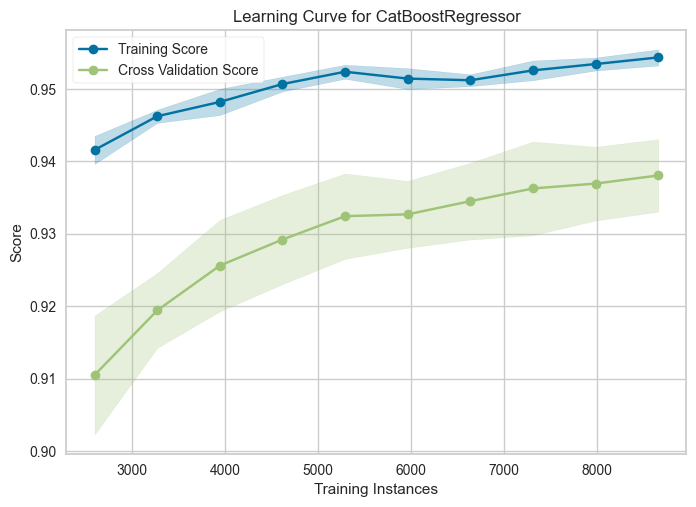

In [ ]:
# plot the Linear Regression model to check for overfitting
plot_model(tuned_model, plot='learning')

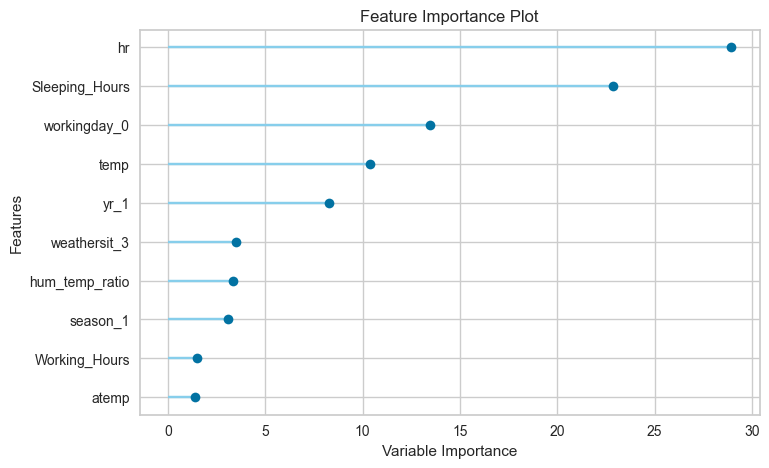

In [ ]:
# Feature Importance Plot
plot_model(tuned_model, plot='feature')

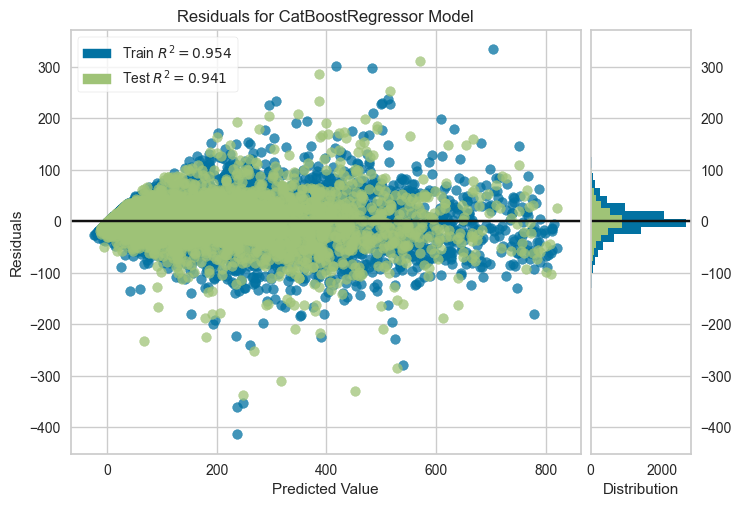

In [ ]:
# Residual Plot
plot_model(tuned_model, plot='residuals')

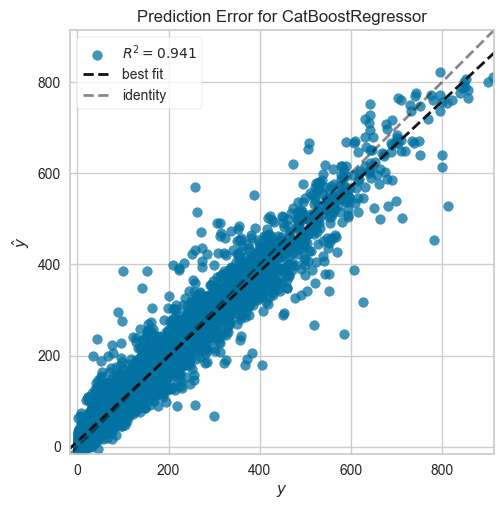

In [ ]:

# Prediction Error Plot
plot_model(tuned_model, plot='error')

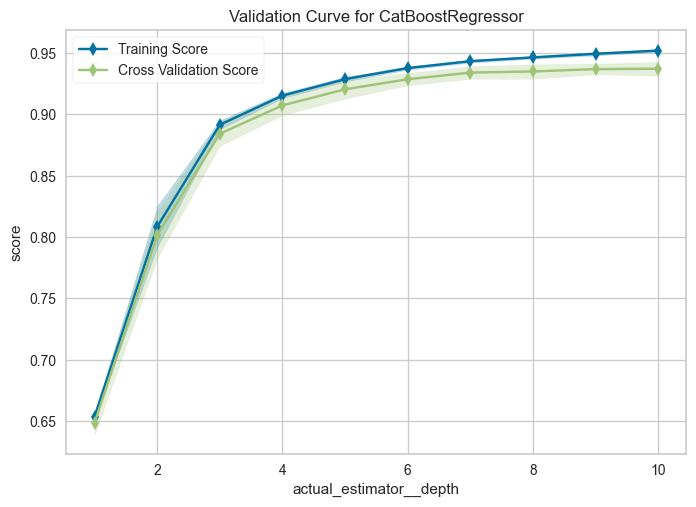

In [ ]:
# Validation Curve
plot_model(tuned_model, plot='vc')

## PART III: Streamlit dashboard

In [ ]:
### This part goes in a separate script ###